# Optimization

In [1]:
import modules
from modules import Aqua_Obj
from optimization import OpData
import optimization
from utilities import *
import copy
import numpy as np
import importlib
importlib.reload(modules)
from matplotlib import pyplot as plt



max_iter = 2000

def wecpen_opt(all_vars, *args):
    wec_types = ['point absorber'] #,'attenuator','terminator','point_absorber_RM3']
    
    x_name = ['x_wec','x_pen']
    p_name = ['x_type_wec'] #,'x_env'

    x = OpData(x_name)
    if 'x0' in args[0]:
        for i in range(len(x.list)):
            x.nom_dict[x.list[i]] = args[0]['x0'][i]
    
    param = OpData(p_name)

    #optimization
    res={}
    res_best = {}
    init_flag = 1

    for i in range(len(wec_types)):
        param.nom_dict['wec_type'] = wec_types[i]

        res_opt, op_obj, p = optimization.run_optimization(x.name, x.nom0, param.name, param.nom_dict, all_vars, max_iter)

        if init_flag:
            x_init, p_init = x , p
            res_best = copy.copy(res_opt)
            p_best = p.nom_dict
        elif (res_opt.success) and (res_opt.fun < res_best.fun):
            res_best = copy.copy(res_opt)
            p_best = p.nom_dict

        init_flag = 0
    
    return x_init, p_init, x, res_best, p_best, op_obj    
    

# list all system desgin variables and parameters
all_vars = ['x_wec','x_type_wec','x_pen','p_pen','x_env','p_env','p_wec','p_fish_salmon']
args = {}
x_init, p_init, x, res_best, p_best, op_obj = wecpen_opt(all_vars, args)

init_result(x_init.nom0, x_init.name, p_init.nom_dict)
optimize_result(x.name, x.list, x.unit, res_best, p_best)


Initial objective function terms:
   cost_per_yield      6.122 [$/kg]
   price          9040053.649 [$]
   fish_yield     1476598.813 [kg]
----------------------------------------
Initial WEC rated power:
   wave power        5.959 [kW]
   P_rated         270.141 [kW]
----------------------------------------
Initial constraints:
   normalized P_gen_cons               -0.277 [-]
   normalized fish_yield_cons          -0.124 [-]
   normalized pen_ratio_low_cons        0.333 [-]
   normalized pen_ratio_up_cons         0.500 [-]
----------------------------------------
Initial carrying capacity:
   TPF_O2               10035144.780 [kg fish/year]
   Carrying Capacity    1313906.309 [kg fish]
----------------------------------------
++++++++++++++++++++++++++++++++++++++++
True
optimal design variable:
   capture_width      17.104 [m]
   pen_diameter       21.355 [m]
   pen_height         15.923 [m]
   stock_density      20.000 [kg/m^3]
----------------------------------------
optimal objec

# Plot fish growth and fish oxygen demand

DO2 for 1kg fish 589.6620855311594
DO2 for 2kg fish 1263.053738597095
fish weight after 365 days 2854.889246518036


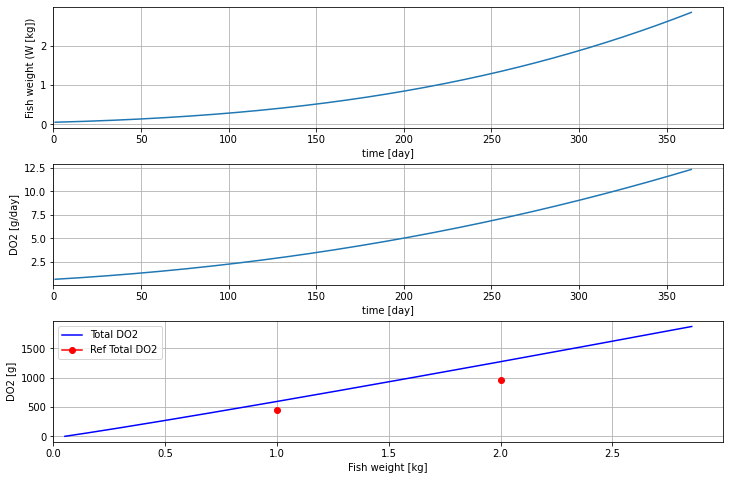

In [2]:
aqua_opt_obj = Aqua_Obj(res_best.x, x.name, p_best) 
aqua_opt_obj.fish.plot_variable()

# Plot objective function and constraints

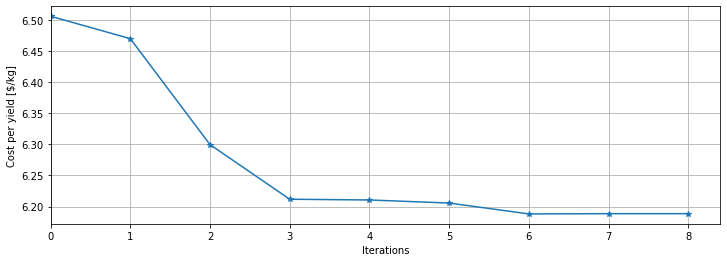

In [3]:
fig, ax = plt.subplots(1,1, figsize=(12, 4))
ax.plot(op_obj.f, marker='*')
ax.set(xlabel='Iterations', ylabel='Cost per yield [$/kg]')
#ax.legend()
ax.grid(True)
ax.set_xlim(0, None)
plt.show()

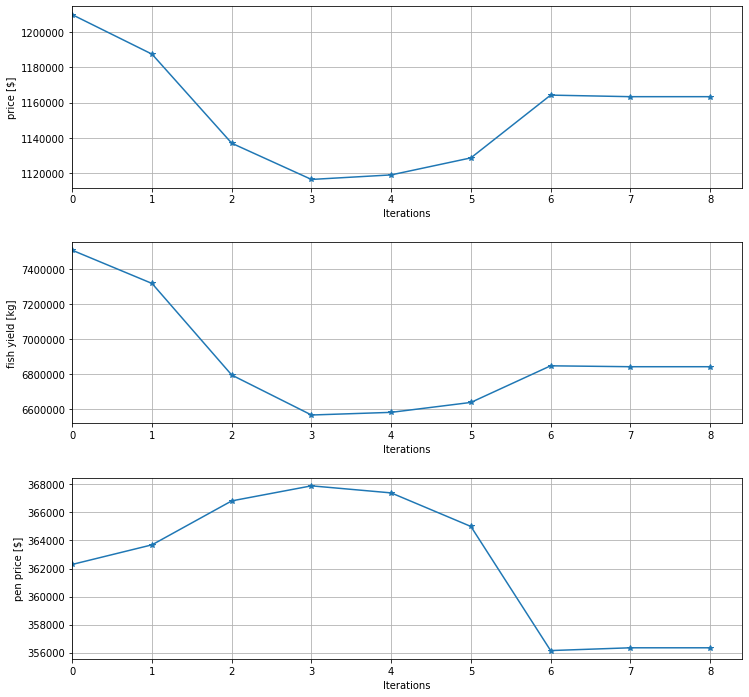

In [4]:
item_no = len(modules.obj_terms(res_best.x, x.name, p_best)) - 1  # the first onw is objective func
item_name = ['price [$]', 'fish yield [kg]', 'pen price [$]', 'wec price [$]']
fig, ax = plt.subplots(item_no,1, figsize=(12, 12))

for i in range(item_no):
    ax[i] = plt.subplot(item_no,1,i+1)
    ax[i].plot(op_obj.obj_term_history[:, i+1], marker='*')
    ax[i].set(xlabel='Iterations', ylabel=item_name[i])
    #ax[i].legend(x_list)
    plt.grid(True)
    ax[i].set_xlim(0, None)
    ax[i].ticklabel_format(useOffset=False, style='plain', axis='y')
    #ax[i].yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))


plt.subplots_adjust(hspace=0.3)
plt.show()

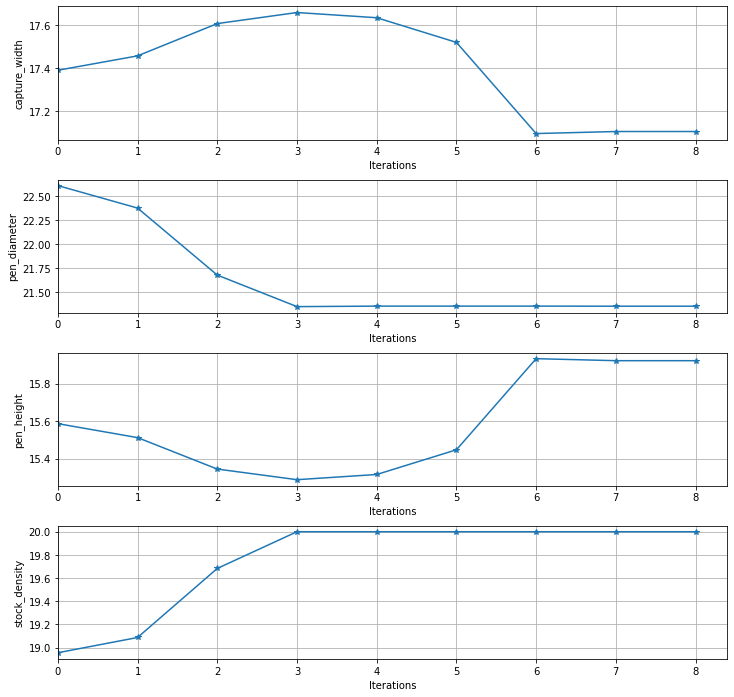

In [5]:
fig, ax = plt.subplots(len(x.list),1, figsize=(12, 12))

for i in range(len(x.list)):
    ax[i] = plt.subplot(len(x.list),1,i+1)
    ax[i].plot(op_obj.x_history[:, i], marker='*')
    ax[i].set(xlabel='Iterations', ylabel=x.list[i])
    #ax[i].legend(x_list)
    plt.grid(True)
    ax[i].set_xlim(0, None)
   #ax[i].set_ylim(5, 85)
    #ax[i].ticklabel_format(useOffset=False, style='plain', axis='y')
    #ax[i].yaxis.set_major_formatter(FormatStrFormatter('%0.1f'))


plt.subplots_adjust(hspace=0.3)
plt.show()

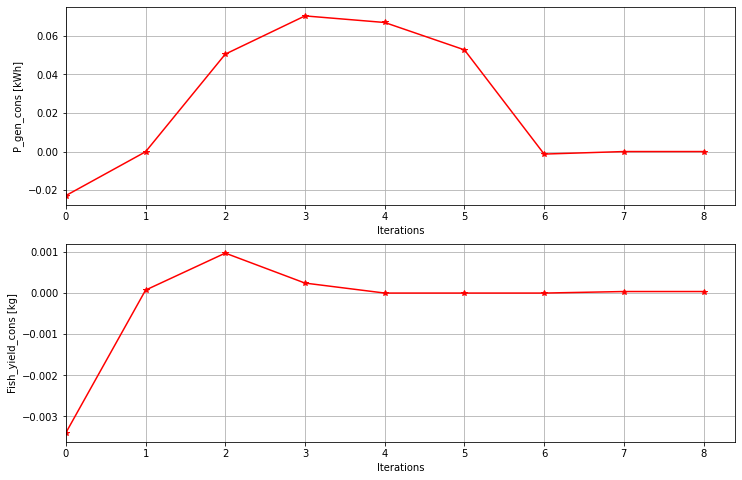

In [6]:
fig, ax = plt.subplots(2,1, figsize=(12, 8))

ax1 = plt.subplot(2,1,1)
ax1.plot(op_obj.ineq[:, 0], 'r', marker='*')
ax1.set(xlabel='Iterations', ylabel='P_gen_cons [kWh]');
#ax1.legend()
ax1.grid(True)
ax1.set_xlim(0, None)

ax2 = plt.subplot(2,1,2)
ax2.plot(op_obj.ineq[:, 1], 'r', marker='*')
ax2.set(xlabel='Iterations', ylabel='Fish_yield_cons [kg]');
#ax2.legend()
ax2.grid(True)
ax2.set_xlim(0, None)
plt.show()


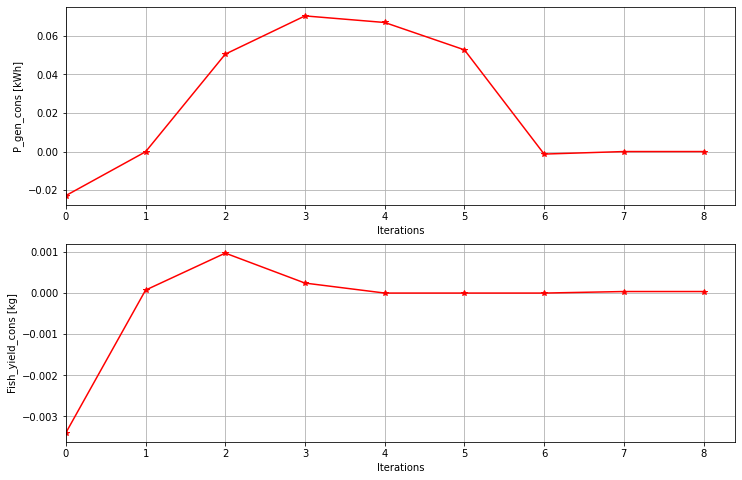

In [7]:
fig, ax = plt.subplots(2,1, figsize=(12, 8))

ax1 = plt.subplot(2,1,1)
ax1.plot(op_obj.eq[:, 0], 'r', marker='*')
ax1.set(xlabel='Iterations', ylabel='P_gen_cons [kWh]');
#ax1.legend()
ax1.grid(True)
ax1.set_xlim(0, None)

ax2 = plt.subplot(2,1,2)
ax2.plot(op_obj.eq[:, 1], 'r', marker='*')
ax2.set(xlabel='Iterations', ylabel='Fish_yield_cons [kg]');
#ax2.legend()
ax2.grid(True)
ax2.set_xlim(0, None)
plt.show()
